In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install --upgrade matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Menyatukan semua dataframe

In [ ]:
jan=pd.read_csv('/content/drive/MyDrive/Dataset/Mizan Amanah Offline/01 TR Donasi Januari 2021.csv', header=1, sep=';')
feb=pd.read_csv('/content/drive/MyDrive/Dataset/Mizan Amanah Offline/02 TR Donasi Februari 2021.csv', header=1, sep=';')
mar=pd.read_csv('/content/drive/MyDrive/Dataset/Mizan Amanah Offline/03 TR Donasi Maret 2021.csv', header=1, sep=';')
apr=pd.read_csv('/content/drive/MyDrive/Dataset/Mizan Amanah Offline/04 TR Donasi April 2021.csv', header=1, sep=';')

jun=pd.read_csv('/content/drive/MyDrive/Dataset/Mizan Amanah Offline/06 TR Donasi Juni 2021.csv', header=1, sep=';')
jul=pd.read_csv('/content/drive/MyDrive/Dataset/Mizan Amanah Offline/07 TR Donasi Juli 2021.csv', header=1, sep=';')
ags=pd.read_csv('/content/drive/MyDrive/Dataset/Mizan Amanah Offline/08 TR Donasi Agustus 2021.csv', header=1, sep=';')
sep=pd.read_csv('/content/drive/MyDrive/Dataset/Mizan Amanah Offline/09 TR Donasi September 2021.csv', header=1, sep=';')
okt=pd.read_csv('/content/drive/MyDrive/Dataset/Mizan Amanah Offline/10 TR Donasi Oktober 2021.csv', header=1, sep=';')
nov=pd.read_csv('/content/drive/MyDrive/Dataset/Mizan Amanah Offline/11 TR Donasi November 2021.csv', header=1, sep=';')
des=pd.read_csv('/content/drive/MyDrive/Dataset/Mizan Amanah Offline/12 TR Donasi Desember 2021.csv', header=1, sep=';')

In [ ]:
jan.head()

,No,Kode,Muzaki,Akad,Metode Pembayaran,Nominal,Tanggal Donasi
0,1,KP001010121001ZIS,YUNE SUSAN,Beasiswa,Tunai,66.000,01/01/2021 12:38
1,2,KP001010121002ZIS,aidil,Sedekah,Tunai,300.000,01/01/2021 13:19
2,3,KP001010121003ZIS,FIRDAUS,Sedekah,Tunai,200.000,01/01/2021 13:26
3,4,KP001010121004ZIS,hamba allah,Sedekah,Tunai,1.000.000,01/01/2021 14:48
4,5,KP001010121005ZIS,BAFERA MUSTIKA RAHAYU,Sedekah,Tunai,55.000,01/01/2021 15:22


In [ ]:
# Ubah kolom "Tanggal Donasi" januari jadi datetime 
jan_dt_fixed=jan.copy()
jan_dt_fixed.loc[:, ['Tanggal Donasi']]=pd.to_datetime(jan.loc[:, 'Tanggal Donasi'], format='%d/%m/%Y %H:%M')

In [ ]:
df_temp=pd.concat([feb, mar, apr, jun, jul, ags, sep, okt, nov, des], axis=0)
df_temp.head()

,No,Kode,Muzaki,Akad,Metode Pembayaran,Nominal,Tanggal Donasi,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,1,KP001010221001WKF,Bpk IIs iskandar,WAKAF Produktif,Tunai,150.000,2021-02-01 08:38:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,KP001010221001ZIS,KPY Asrama Pojok,KPY,Tunai,570.000,2021-02-01 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,KP001010221002ZIS,Bp Irawan,Infaq,Tunai,500.000,2021-02-01 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,KP001010221003ZIS,Bp Irawan & Ibu Arsunah,Sedekah,Tunai,50.000,2021-02-01 10:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,KP001010221004ZIS,Bpk Aidil,Sedekah,Tunai,400.000,2021-02-01 11:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Buang kolom yang gaperlu dari df_temp dan ubah "Tanggal Donasi" jadi datetime format
df_temp_dt_fixed=df_temp.copy()
df_temp_dt_fixed=df_temp.iloc[:,0:7]
df_temp_dt_fixed.loc[:, ['Tanggal Donasi']]=pd.to_datetime(df_temp.loc[:, 'Tanggal Donasi'], format='%Y-%m-%d %H:%M')

In [ ]:
# Gabung semua jd 1 dataframe
df=pd.concat([jan_dt_fixed, df_temp_dt_fixed], axis=0)

### Data Preprocessing

In [ ]:
df.head()

,No,Kode,Muzaki,Akad,Metode Pembayaran,Nominal,Tanggal Donasi
0,1,KP001010121001ZIS,YUNE SUSAN,Beasiswa,Tunai,66.000,2021-01-01 12:38:00
1,2,KP001010121002ZIS,aidil,Sedekah,Tunai,300.000,2021-01-01 13:19:00
2,3,KP001010121003ZIS,FIRDAUS,Sedekah,Tunai,200.000,2021-01-01 13:26:00
3,4,KP001010121004ZIS,hamba allah,Sedekah,Tunai,1.000.000,2021-01-01 14:48:00
4,5,KP001010121005ZIS,BAFERA MUSTIKA RAHAYU,Sedekah,Tunai,55.000,2021-01-01 15:22:00


In [ ]:
# Ubah kolom Tanggal Donasi ke datetime format
df.loc[:,['Tanggal Donasi']]=pd.to_datetime(df.loc[:,'Tanggal Donasi'])

In [ ]:
# Tambah kolom baru berisi nama asli
df.loc[:, 'Nama_Asli']=df.loc[:, 'Muzaki']
df.head()

,No,Kode,Muzaki,Akad,Metode Pembayaran,Nominal,Tanggal Donasi,Nama_Asli
0,1,KP001010121001ZIS,YUNE SUSAN,Beasiswa,Tunai,66.000,2021-01-01 12:38:00,YUNE SUSAN
1,2,KP001010121002ZIS,aidil,Sedekah,Tunai,300.000,2021-01-01 13:19:00,aidil
2,3,KP001010121003ZIS,FIRDAUS,Sedekah,Tunai,200.000,2021-01-01 13:26:00,FIRDAUS
3,4,KP001010121004ZIS,hamba allah,Sedekah,Tunai,1.000.000,2021-01-01 14:48:00,hamba allah
4,5,KP001010121005ZIS,BAFERA MUSTIKA RAHAYU,Sedekah,Tunai,55.000,2021-01-01 15:22:00,BAFERA MUSTIKA RAHAYU


Kolom "muzaki" akan dipreprocess sedangkan kolom "nama_asli" digunakan untuk keperluan mengubah nama yang telah dipreprocess menjadi semula

#### 1. Drop Row No dan mereset index

In [ ]:
# 1. Drop Row No dan mereset index
df.drop('No', axis=1, inplace=True)
#df.reset_index(inplace=True)

In [ ]:
df.head(3)

,Kode,Muzaki,Akad,Metode Pembayaran,Nominal,Tanggal Donasi,Nama_Asli
0,KP001010121001ZIS,YUNE SUSAN,Beasiswa,Tunai,66.000,2021-01-01 12:38:00,YUNE SUSAN
1,KP001010121002ZIS,aidil,Sedekah,Tunai,300.000,2021-01-01 13:19:00,aidil
2,KP001010121003ZIS,FIRDAUS,Sedekah,Tunai,200.000,2021-01-01 13:26:00,FIRDAUS


#### 2. Ngubah nama jd lowercase semua

In [ ]:
df.Muzaki.nunique()

42412

In [ ]:
# 2. Ngubah nama jd lowercase semua
df.loc[:,["Muzaki"]]=df["Muzaki"].str.lower()
df.head(3)

,Kode,Muzaki,Akad,Metode Pembayaran,Nominal,Tanggal Donasi,Nama_Asli
0,KP001010121001ZIS,yune susan,Beasiswa,Tunai,66.000,2021-01-01 12:38:00,YUNE SUSAN
1,KP001010121002ZIS,aidil,Sedekah,Tunai,300.000,2021-01-01 13:19:00,aidil
2,KP001010121003ZIS,firdaus,Sedekah,Tunai,200.000,2021-01-01 13:26:00,FIRDAUS


In [ ]:
df.Muzaki.nunique()

39403

#### 3. Ngilangin singkatan di depan/sebutan kyk "Bp", "Bpk", "ibu", dan "kel."

In [ ]:
daftar_singkatan=['bpk', 'bp', 'h.', 'hj', 'ibu', 'kel', 'almh', 'almarhum', 'alm', 'bapak', 'keluarga', 'mr', 'bunda','kakak', 'kak']

for i in daftar_singkatan:
  df.loc[:,["Muzaki"]]=df["Muzaki"].str.replace(i, '', regex=False)

df.head()

,Kode,Muzaki,Akad,Metode Pembayaran,Nominal,Tanggal Donasi,Nama_Asli
0,KP001010121001ZIS,yune susan,Beasiswa,Tunai,66.000,2021-01-01 12:38:00,YUNE SUSAN
1,KP001010121002ZIS,aidil,Sedekah,Tunai,300.000,2021-01-01 13:19:00,aidil
2,KP001010121003ZIS,firdaus,Sedekah,Tunai,200.000,2021-01-01 13:26:00,FIRDAUS
3,KP001010121004ZIS,hamba allah,Sedekah,Tunai,1.000.000,2021-01-01 14:48:00,hamba allah
4,KP001010121005ZIS,bafera mustika rahayu,Sedekah,Tunai,55.000,2021-01-01 15:22:00,BAFERA MUSTIKA RAHAYU


In [ ]:
df.Muzaki.nunique()

38499

#### 4. Ngilangin spasi dan titik

In [ ]:
# 4. Ngilangin spasi dan titik
df.loc[:,["Muzaki"]]=df["Muzaki"].str.replace(' ', '')
df.loc[:,["Muzaki"]]=df["Muzaki"].str.replace('.', '')
df.head(3)

,Kode,Muzaki,Akad,Metode Pembayaran,Nominal,Tanggal Donasi,Nama_Asli
0,KP001010121001ZIS,yunesusan,Beasiswa,Tunai,66.000,2021-01-01 12:38:00,YUNE SUSAN
1,KP001010121002ZIS,aidil,Sedekah,Tunai,300.000,2021-01-01 13:19:00,aidil
2,KP001010121003ZIS,firdaus,Sedekah,Tunai,200.000,2021-01-01 13:26:00,FIRDAUS


In [ ]:
df.Muzaki.nunique()

33227

#### 4. Drop nilai kosong yang ada di kolom nama by row

In [ ]:
# 5. Drop angka yang ada di kolom nama
df.dropna(subset=['Muzaki'], inplace=True)

In [ ]:
df.loc[df.Muzaki=='']

,Kode,Muzaki,Akad,Metode Pembayaran,Nominal,Tanggal Donasi,Nama_Asli
2185,KP011190321008ZIS,,Sedekah,Tunai,300.000,2021-03-19 17:52:00,ibu
5647,KP036200821006ZIS,,Sedekah,Tunai,500.000,2021-08-20 11:17:00,BUNDA
4495,KP028121021003ZIS,,Sedekah,Tunai,500.000,2021-10-12 16:37:00,IBU
4541,KP028261021002ZIS,,Sedekah,Tunai,250.000,2021-10-26 19:38:00,bapak
7412,KP054191121007ZIS,,Beasiswa,Tunai,550.000,2021-11-19 17:17:00,Kakak


In [ ]:
df=df.loc[df.Muzaki!='']

In [ ]:
df.Muzaki.nunique()

33226

#### 6. Ngedrop nama yang ada "hamba Allah" dan variasinya by row

In [ ]:
# 6. Ngedrop nama yang ada "hamba Allah" dan variasinya by row
df=df.loc[(df.Muzaki.str.contains('hamba')==False)]

In [ ]:
pd.DataFrame(df.loc[(df.Muzaki.str.contains('hamb')==True)].Muzaki.value_counts())

,Muzaki
safrinsihambing,2
ilhamb,1
hambsallah,1
ridwandirhambindirham,1
trihambodo,1
muhamadalarhambinzaidarham,1
pakyediandriannosudirhambinjonosoedirham,1
hambotuwo,1


In [ ]:
df.value_counts('Muzaki')

Muzaki
kpyasramayogyakarta         299
ayu                         140
kpybanjarmasin              138
kpyasramamalang             128
hayumardania                116
                           ... 
nahkowi                       1
naiaputiaulia                 1
naiktuasinabutardanuarga      1
nailaalexiaaqritia            1
&                             1
Length: 33079, dtype: int64

In [ ]:
df.Muzaki.nunique()

33079

#### 7. Ngilangin tanda titik di kolom nominal, kemudian ubah tipe data kolom tsb jadi integer

In [ ]:
# Ngilangin tanda titik di kolom nominal
df.loc[:,["Nominal"]]=df["Nominal"].str.replace('.', '', regex=False)
df.head(3)

,Kode,Muzaki,Akad,Metode Pembayaran,Nominal,Tanggal Donasi,Nama_Asli
0,KP001010121001ZIS,yunesusan,Beasiswa,Tunai,66000,2021-01-01 12:38:00,YUNE SUSAN
1,KP001010121002ZIS,aidil,Sedekah,Tunai,300000,2021-01-01 13:19:00,aidil
2,KP001010121003ZIS,firdaus,Sedekah,Tunai,200000,2021-01-01 13:26:00,FIRDAUS


In [ ]:
# Ngubah tipe data kolom tsb jadi integer
df.loc[:, ['Nominal']]=pd.to_numeric(df['Nominal'], downcast='integer')

In [ ]:
df.isnull().sum()

Kode                  0
Muzaki                0
Akad                  0
Metode Pembayaran     0
Nominal              16
Tanggal Donasi        0
Nama_Asli             0
dtype: int64

#### 8. Mengisi data nominal yang kosong

In [ ]:
df.replace(1, np.nan, inplace=True)

In [ ]:
df.isnull().sum()

Kode                  0
Muzaki                0
Akad                  0
Metode Pembayaran     0
Nominal              24
Tanggal Donasi        0
Nama_Asli             0
dtype: int64

Melihat jenis metode pembayaran apa saja pada nilai nominal yang kosong

In [ ]:
unique_metode=df.loc[df.Nominal.isnull(), 'Metode Pembayaran'].unique()
unique_metode

array(['Transfer', 'Tunai', 'EDC'], dtype=object)

In [ ]:
df.loc[(df['Metode Pembayaran']=='Transfer') | (df['Metode Pembayaran']=='Tunai') | (df['Metode Pembayaran']=='EDC'), 
       ['Metode Pembayaran', 'Nominal']].groupby('Metode Pembayaran').describe()

Nominal                 ...                        
                     count           mean  ...        75%          max
Metode Pembayaran                          ...                        
EDC                 3089.0  818346.159922  ...  1000000.0   20000000.0
Transfer           13294.0  626621.801790  ...   500000.0  733280161.0
Tunai              51921.0  529182.219141  ...   500000.0   37500000.0

[3 rows x 8 columns]

Karena std nya terlampau besar, kami akan mengisi data nominal yang kosong menggunakan median

In [ ]:
for i in unique_metode:
  df.loc[(df.Nominal.isnull()==True)&(df['Metode Pembayaran']==i),'Nominal']=df.loc[df['Metode Pembayaran']==i, 'Nominal'].median()

In [ ]:
df.isnull().sum()

Kode                 0
Muzaki               0
Akad                 0
Metode Pembayaran    0
Nominal              0
Tanggal Donasi       0
Nama_Asli            0
dtype: int64

#### 9. Menghilangkan nama muzaki yang berupa angka

In [ ]:
df.loc[(df.Kode=='Kp047071021002ZIS')|
       (df.Kode=='KP020030821005ZIS')|
       (df.Kode=='KP044190321003ZIS')|
       (df.Kode=='KP044040621007ZIS')|
       (df.Kode=='KP012240421002ZIS')|
       (df.Kode=='KP005040421002ZIS')|
       (df.Kode=='KP015160121003ZIS')|
       (df.Kode=='KP015210321004ZIS')|
       (df.Kode=='KP027280121007ZIS')|
       (df.Kode=='KP005290121001ZIS')|
       (df.Kode=='KP034111121004ZIS')|
       (df.Kode=='KP014190921002ZIS')]


,Kode,Muzaki,Akad,Metode Pembayaran,Nominal,Tanggal Donasi,Nama_Asli
1382,KP005290121001ZIS,816955811,Zakat,EDC,250000.0,2021-01-29 10:49:00,816955811
3141,KP015160121003ZIS,1826,Sedekah,Tunai,200000.0,2021-01-16 20:52:00,1826
4628,KP027280121007ZIS,"8,95343e+11",Sedekah,Tunai,300000.0,2021-01-28 18:17:00,"8,95343E+11"
2921,KP015210321004ZIS,1826,Sedekah,Tunai,200000.0,2021-03-21 20:47:00,1826
6260,KP044190321003ZIS,085262727384,Sedekah,Tunai,200000.0,2021-03-19 17:06:00,085262727384
1438,KP005040421002ZIS,087883610809,Sedekah,Tunai,500000.0,2021-04-04 13:41:00,087883610809
2934,KP012240421002ZIS,085325709888,Sedekah,Tunai,1500000.0,2021-04-24 13:41:00,085325709888
5252,KP044040621007ZIS,085287250991,Infaq,Tunai,50000.0,2021-06-04 17:06:00,085287250991
3360,KP020030821005ZIS,081389464343,Sedekah,Transfer,500000.0,2021-08-03 15:11:00,081389464343
2553,KP014190921002ZIS,200000,Sedekah,Tunai,200000.0,2021-09-19 14:30:00,200000


In [ ]:
df=df.loc[(df.Kode!='Kp047071021002ZIS')&
       (df.Kode!='KP020030821005ZIS')&
       (df.Kode!='KP044190321003ZIS')&
       (df.Kode!='KP044040621007ZIS')&
       (df.Kode!='KP012240421002ZIS')&
       (df.Kode!='KP005040421002ZIS')&
       (df.Kode!='KP015160121003ZIS')&
       (df.Kode!='KP015210321004ZIS')&
       (df.Kode!='KP027280121007ZIS')&
       (df.Kode!='KP005290121001ZIS')&
       (df.Kode!='KP034111121004ZIS')&
       (df.Kode!='KP014190921002ZIS')]

In [ ]:
df.head()

,Kode,Muzaki,Akad,Metode Pembayaran,Nominal,Tanggal Donasi,Nama_Asli
0,KP001010121001ZIS,yunesusan,Beasiswa,Tunai,66000.0,2021-01-01 12:38:00,YUNE SUSAN
1,KP001010121002ZIS,aidil,Sedekah,Tunai,300000.0,2021-01-01 13:19:00,aidil
2,KP001010121003ZIS,firdaus,Sedekah,Tunai,200000.0,2021-01-01 13:26:00,FIRDAUS
4,KP001010121005ZIS,baferamustikarahayu,Sedekah,Tunai,55000.0,2021-01-01 15:22:00,BAFERA MUSTIKA RAHAYU
5,KP001010121006ZIS,selamet/warsini,Sedekah,Tunai,500000.0,2021-01-01 16:21:00,Selamet / Warsini


#### 10. Mengembalikan nama yang telah dipre-process menjadi nama semula 

In [ ]:
# Membuat DataFrame baru berisi index dan nama yang telah di pre-process
id_nama=pd.DataFrame(df.Muzaki.unique()).reset_index().rename({0: 'Muzaki', 'index':'id'}, axis=1)
id_nama.head()

,id,Muzaki
0,0,yunesusan
1,1,aidil
2,2,firdaus
3,3,baferamustikarahayu
4,4,selamet/warsini


In [ ]:
df=df.merge(id_nama, left_on='Muzaki', right_on='Muzaki')
df.head()

,Kode,Muzaki,Akad,Metode Pembayaran,Nominal,Tanggal Donasi,Nama_Asli,id
0,KP001010121001ZIS,yunesusan,Beasiswa,Tunai,66000.0,2021-01-01 12:38:00,YUNE SUSAN,0
1,KP001010121002ZIS,aidil,Sedekah,Tunai,300000.0,2021-01-01 13:19:00,aidil,1
2,KP001010221004ZIS,aidil,Sedekah,Tunai,400000.0,2021-02-01 11:07:00,Bpk Aidil,1
3,KP001040321001ZIS,aidil,Sedekah,Tunai,300000.0,2021-03-04 09:07:00,aidil,1
4,KP002100921001ZIS,aidil,Sedekah,Tunai,400000.0,2021-09-10 09:24:00,Bpk Aidil,1


### EDA

#### Monetary

In [ ]:
df_1=pd.DataFrame()
df_1

""


In [ ]:
df_1['Monetary'] = df.groupby('id')['Nominal'].sum()
df_1

,Monetary
id,
0,66000.0
1,1400000.0
2,71850000.0
3,55000.0
4,500000.0
...,...
33063,500000.0
33064,400000.0
33065,800000.0


#### Frequency

In [ ]:
df_1['Frequency'] = df.groupby('id')['Kode'].count()
df_1

,Monetary,Frequency
id,,
0,66000.0,1
1,1400000.0,4
2,71850000.0,21
3,55000.0,1
4,500000.0,1
...,...,...
33063,500000.0,1
33064,400000.0,1
33065,800000.0,1


#### Recency

In [ ]:
df.loc[:, 'Tanggal Donasi'] = pd.to_datetime(df['Tanggal Donasi'])
ref_date = df['Tanggal Donasi'].max()
df['Tanggal Donasi'] = df['Tanggal Donasi'].apply(lambda x: x.date())
df_1['Most_Recent_Purchase'] = df.groupby('id')['Tanggal Donasi'].transform(max)
df_1['Recency'] = (ref_date.date() - df_1.Most_Recent_Purchase).astype('timedelta64[D]')

In [ ]:
df_1 = df_1.drop('Most_Recent_Purchase', axis=1)

#### RFM

In [ ]:
RFM_df = df_1.reset_index()
RFM_df

,id,Monetary,Frequency,Recency
0,0,66000.0,1,335.0
1,1,1400000.0,4,83.0
2,2,71850000.0,21,83.0
3,3,55000.0,1,83.0
4,4,500000.0,1,83.0
...,...,...,...,...
33063,33063,500000.0,1,59.0
33064,33064,400000.0,1,59.0
33065,33065,800000.0,1,59.0
33066,33066,750000.0,1,59.0


In [ ]:
RFM_quantiles = RFM_df[['Recency', 'Frequency', 'Monetary']].quantile(q = [0.25, 0.5, 0.75])

RFM_df.loc[(RFM_df['Recency'] <= RFM_quantiles.Recency[0.25]), 'Rscore'] = 4.0
RFM_df.loc[(RFM_df['Recency'] > RFM_quantiles.Recency[0.25]) & (RFM_df.Recency <= RFM_quantiles.Recency[0.5]), 'Rscore'] = 3.0
RFM_df.loc[(RFM_df['Recency'] > RFM_quantiles.Recency[0.5]) & (RFM_df.Recency <= RFM_quantiles.Recency[0.75]), 'Rscore'] = 2.0
RFM_df.loc[(RFM_df['Recency'] > RFM_quantiles.Recency[0.75]), 'Rscore'] = 1.0

RFM_df.loc[(RFM_df['Frequency'] <= RFM_quantiles.Frequency[0.25]), 'Fscore'] = 1.0
RFM_df.loc[(RFM_df['Frequency'] > RFM_quantiles.Frequency[0.25]) & (RFM_df['Frequency'] <= RFM_quantiles.Frequency[0.5]), 'Fscore'] = 2.0
RFM_df.loc[(RFM_df['Frequency'] > RFM_quantiles.Frequency[0.5]) & (RFM_df['Frequency'] <= RFM_quantiles.Frequency[0.75]), 'Fscore'] = 3.0
RFM_df.loc[(RFM_df['Frequency'] > RFM_quantiles.Frequency[0.75]), 'Fscore'] = 4.0

RFM_df.loc[(RFM_df['Monetary'] <= RFM_quantiles.Monetary[0.25]), 'Mscore'] = 1.0
RFM_df.loc[(RFM_df['Monetary'] > RFM_quantiles.Monetary[0.25]) & (RFM_df['Monetary'] <= RFM_quantiles.Monetary[0.5]), 'Mscore'] = 2.0
RFM_df.loc[(RFM_df['Monetary'] > RFM_quantiles.Monetary[0.5]) & (RFM_df['Monetary'] <= RFM_quantiles.Monetary[0.75]), 'Mscore'] = 3.0
RFM_df.loc[(RFM_df['Monetary'] > RFM_quantiles.Monetary[0.75]), 'Mscore'] = 4.0

RFM_df['RFM_score'] = RFM_df.Rscore + RFM_df.Fscore + RFM_df.Mscore

In [ ]:
RFM_df.loc[(RFM_df['RFM_score'] == 12.0), 'Cluster'] = 'Champions'
RFM_df.loc[(RFM_df['RFM_score'] == 11.0), 'Cluster'] = 'Loyal Customers'
RFM_df.loc[(RFM_df['RFM_score'] >= 9.0) & (RFM_df['RFM_score'] <= 10.0), 'Cluster'] = 'Promising Customers'
RFM_df.loc[(RFM_df['RFM_score'] >= 7.0) & (RFM_df['RFM_score'] <= 8.0), 'Cluster'] = 'At Risk'
RFM_df.loc[(RFM_df['RFM_score'] >= 4.0) & (RFM_df['RFM_score'] <= 6.0), 'Cluster'] = 'Hibernating'
RFM_df.loc[(RFM_df['RFM_score'] == 3.0), 'Cluster'] = 'Lost Customers'

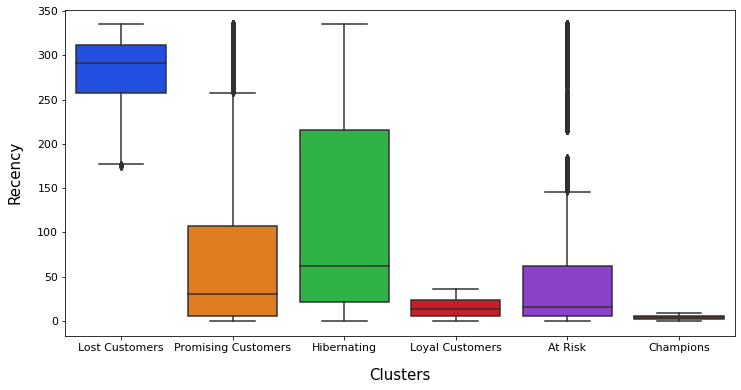

In [ ]:
plt.figure(figsize=(12,6))

ax = sns.boxplot(data=RFM_df, x='Cluster', y = 'Recency', palette='bright');
plt.xticks( fontsize=11)
plt.yticks( fontsize=11)
plt.xlabel('Clusters', fontsize=15, labelpad=15, color='black')
plt.ylabel('Recency', fontsize=15, labelpad=15, color='black');
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black');

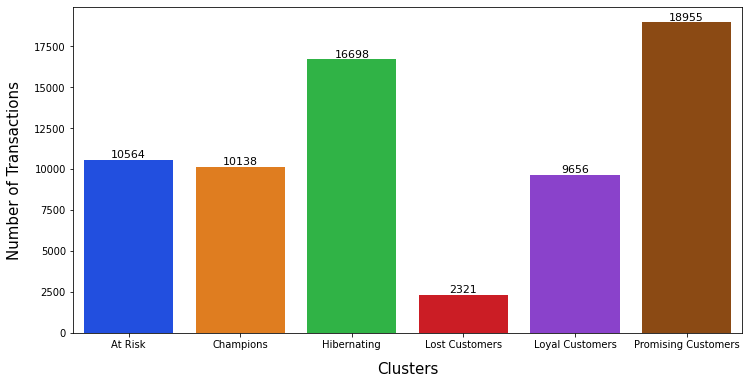

In [ ]:
frequency = RFM_df.groupby('Cluster')['Frequency'].sum()
frequency_df = pd.DataFrame(list(frequency.items()), columns=['Cluster', 'Number_of_Purchases'])

plt.figure(figsize=(12,6))

ax = sns.barplot(data=frequency_df, x='Cluster', y='Number_of_Purchases', palette='bright')
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 11, color='black')
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Clusters', fontsize=15, labelpad=12, color='black')
plt.ylabel('Number of Transactions', fontsize=15, labelpad=12, color='black');
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black');

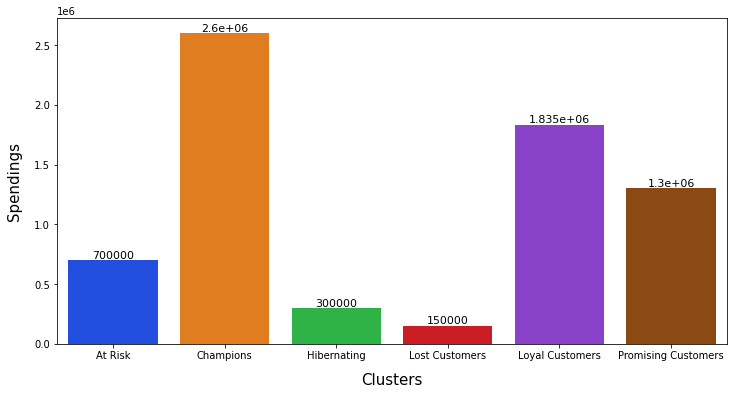

In [ ]:
frequency = RFM_df.groupby('Cluster')['Monetary'].median()
frequency_df = pd.DataFrame(list(frequency.items()), columns=['Cluster', 'Spendings'])

plt.figure(figsize=(12,6))

ax = sns.barplot(data=frequency_df, x='Cluster', y='Spendings', palette='bright')
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 11, color='black')
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Clusters', fontsize=15, labelpad=12, color='black')
plt.ylabel('Spendings', fontsize=15, labelpad=12, color='black');
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black');

In [ ]:
final_df=RFM_df.merge(df.loc[:, ['id', 'Nama_Asli']].drop_duplicates('id'), left_on='id', 
                      right_on='id')[['Nama_Asli', 'Rscore',	'Fscore', 'Mscore',	'RFM_score', 'Cluster']].rename({'Nama_Asli':'Muzaki'})
final_df.head()

,Nama_Asli,Rscore,Fscore,Mscore,RFM_score,Cluster
0,YUNE SUSAN,1.0,1.0,1.0,3.0,Lost Customers
1,aidil,2.0,4.0,4.0,10.0,Promising Customers
2,FIRDAUS,2.0,4.0,4.0,10.0,Promising Customers
3,BAFERA MUSTIKA RAHAYU,2.0,1.0,1.0,4.0,Hibernating
4,Selamet / Warsini,2.0,1.0,2.0,5.0,Hibernating
...,...,...,...,...,...,...
33063,mbak eka prihatin,2.0,1.0,2.0,5.0,Hibernating
33064,bpk fahrizal anas,2.0,1.0,2.0,5.0,Hibernating
33065,hidayatul musthofa,2.0,1.0,3.0,6.0,Hibernating
33066,Bunda Intan & Kak Rini,2.0,1.0,3.0,6.0,Hibernating
